In [97]:
# If not installed, run this cell. It is needed to access Metrics of Hydrologic Skill
#!pip install HydroErr
#!pip show HydroErr

In [98]:
#!pip install --upgrade numpy

In [99]:
import pandas as pd
import HydroErr as he
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
css_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\Streamflow_Stations\Climate_Sensitive_Stations-GRDC"

filtered_css = pd.read_csv(css_folder + "//CSS_FINAL_SELECTION-MERGE_WITH_ALL.csv") # Read file with all CSS information
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent,has_monthly_k,has_daily_k,monthly_k_recession,daily_k_recession,Next_Downstream_Station,CATCHMENT_SIZE2,Priority,Val_Analysis_Monthly_k
0,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA,Oceania,Yes,No,0.420650,NaN,5204302,2631.00,432,Yes
1,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America,Yes,Yes,0.350868,0.910436,4215103,112.00,773,Yes
2,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America,Yes,Yes,0.417039,0.541509,4125801,2038.30,478,No
3,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America,Yes,Yes,0.625278,0.942386,NaN,70600.00,59,No
4,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America,Yes,Yes,0.549697,0.912838,4122903,7267.50,264,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America,Yes,Yes,0.593689,0.900646,NaN,169.38,732,Yes
805,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America,Yes,Yes,0.627802,0.974853,3649419,364500.00,20,No
806,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America,Yes,Yes,0.786505,0.977071,3649618,24950.00,123,No
807,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America,Yes,Yes,0.718625,0.896280,4148320,5905.00,294,Yes


In [101]:
monthly_folder = css_folder + "\\2025-02-13_17-18_Monthly\_DataFrames"
obs_df = pd.read_csv(monthly_folder + "//Joined_Monthly_Sts_DFs.csv", index_col="YYYY-MM") # Observed data
obs_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705


In [102]:
wyield_folder = r"Z:\PhD_Datasets&Analysis\Outputs\T&M_WBM\wyield2"
sim_df = pd.read_csv(wyield_folder + "\\wyield2_zonal_statistics_1958-2023.csv", index_col="station_no") # Simulated data
sim_df

,YEAR,MONTH,DATE,COUNT,MEAN,FLOW_CMS
station_no,,,,,,
3617110,1958,1,1958-01,29626.0,140.825340,32020.098677
3617110,1958,2,1958-02,29555.0,100.151988,25211.871952
3617110,1958,3,1958-03,29509.0,112.716666,25628.901445
3617110,1958,4,1958-04,29483.0,49.679580,11672.401251
3617110,1958,5,1958-05,29476.0,20.027374,4553.715148
...,...,...,...,...,...,...
6870640,2023,8,2023-08,222.0,5.122293,3.798116
6870640,2023,9,2023-09,222.0,70.731393,54.194655
6870640,2023,10,2023-10,222.0,30.939898,22.941547


In [103]:
sim_df_pivoted = sim_df.reset_index().pivot(index='DATE', columns='station_no', values='FLOW_CMS') # "FLOW_CMS" was calculated using the default area ("CATCHMENT_SIZE2") from GRDC information
sim_df_pivoted.index.name = "YYYY-MM" # Renaming index to YYYY-MM for consistency with observed data
sim_df_pivoted.columns.name = None # Removing the name of the columns to avoid confusion with the observed data
sim_df_pivoted.columns = sim_df_pivoted.columns.map(str) # Converting column names to string for consistency with observed data
sim_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,32020.098677,15127.488910,2685.992394,176.353851,9134.480383,5717.160261,471.948503,12.399583,21.032326,214.797571,...,25.571462,71.146015,41.897598,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757
1958-02,25211.871952,13320.983552,3341.597886,217.345580,7915.628209,4545.912755,408.974562,9.413453,16.224019,185.082656,...,76.765463,379.264285,452.978298,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188
1958-03,25628.901445,17288.728518,4722.755852,197.808173,14972.838493,9063.598240,307.879591,6.019182,10.886260,142.966294,...,69.797982,242.693220,148.387594,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733
1958-04,11672.401251,6288.822255,2149.004082,169.087526,30449.505439,22463.996239,1041.428133,28.144327,49.247438,558.189668,...,364.955753,1041.206880,608.306078,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151
1958-05,4553.715148,716.885141,104.529508,6.442546,16719.886038,12551.979237,3373.177997,177.079161,260.507175,1950.134339,...,84.008344,316.070440,215.130495,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,482.762880,271.824849,36.831258,2.129203,4048.631144,4070.844816,680.172856,32.416420,37.349612,358.368316,...,11.602949,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116
2023-09,579.062094,340.010940,60.705697,3.454298,2689.272554,2396.741240,172.064650,3.990305,6.224914,60.529785,...,8.454616,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655
2023-10,592.828108,318.567675,55.609598,3.671571,512.141638,471.896423,169.001814,4.975983,7.492117,69.875461,...,6.125950,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547


In [104]:
sim_sts = sim_df_pivoted.columns.to_list() # List of stations in the simulated data
len(sim_sts)

808

In [105]:
missing_sts = [col for col in obs_df.columns if col not in sim_sts] # List of stations in the observed data that are not in the simulated data
print(len(missing_sts), missing_sts) # These 2 stations are not in the simulated data as in the previous analysis of monthly recession constant (k) they were discarded.

2 ['4150460', '5708125']


In [106]:
merged_df = obs_df.add_suffix('_obs').join(sim_df_pivoted.add_suffix('_sim'), how='left', on="YYYY-MM") # Merging observed and simulated data on the index (YYYY-MM)
merged_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.571462,71.146015,41.897598,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.765463,379.264285,452.978298,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.797982,242.693220,148.387594,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,364.955753,1041.206880,608.306078,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.008344,316.070440,215.130495,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.602949,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.454616,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.125950,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547


In [107]:
warmup_yrs = 6 # Number of years to be discarded for the warm-up period
initial_year = 1958 + warmup_yrs # Initial year for the analysis

In [108]:
filtered_merged_df = merged_df.loc[merged_df.index >= f'{initial_year}-01']
filtered_merged_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1964-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.772136,51.546536,55.735409,3.551670,6.939422,18.110854,3.678675,1.559274,8.416871,22.263378
1964-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.626217,173.539894,169.361533,3.101345,5.763467,17.585914,3.547367,1.585296,8.325890,21.091268
1964-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.056540,269.124431,308.610439,2.159391,3.092817,8.818659,2.168597,0.980399,5.557542,10.096334
1964-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.826721,790.278287,787.141556,2.495768,5.993304,24.963243,3.257401,2.537895,30.584981,23.327264
1964-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.223528,214.575031,135.742266,21.287580,39.942996,112.745718,22.388287,6.559542,6.107702,152.012228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.602949,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.454616,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.125950,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547


In [109]:
print(he.mae.name)
# Compute the mean absolute error of the simulated and observed data.
# Range: 0 ≤ MAE < inf, data units, smaller is better.
# Notes: The ME measures the absolute difference between the simulated data and the observed data.
# For the mean abolute error, a smaller number indicates a better fit to the original data. 
# Also note that random errors do not cancel. Also referred to as an L1-norm.

print(he.rmse.name)
# Compute the root mean square error between the simulated and observed data.
# Range 0 ≤ RMSE < inf, smaller is better.
# Notes: The standard deviation of the residuals. A lower spread indicates that the points are better concentrated around the line of best fit (linear).
# Random errors do not cancel. This metric will highlights larger errors.

print(he.pearson_r.name)
# Compute the pearson correlation coefficient.
# Range: -1 ≤ R (Pearson) ≤ 1. 1 indicates perfect postive correlation, 0 indicates complete randomness, -1 indicate perfect negative correlation.
# Notes: The pearson r coefficient measures linear correlation. It is sensitive to outliers.

print(he.d1.name) # modified index of agreement (d1)
# Compute the the index of agreement (d1).
# Range: 0 ≤ d < 1, does not indicate bias, larger is better.
# Notes: This metric is a modified approach to the Nash-Sutcliffe Efficiency metric. Compared to the other index of agreement (d) it has a reduced impact of outliers.

print(he.nse.name)
# Compute the Nash-Sutcliffe Efficiency.
# Range: -inf < NSE < 1, does not indicate bias, larger is better.
# Notes: The Nash-Sutcliffe efficiency metric compares prediction values to naive predictions (i.e. average value).
# One major flaw of this metric is that it punishes a higher variance in the observed values (denominator).
# This metric is analogous to the mean absolute error skill score (MAESS) using the mean flow as a benchmark.

print(he.kge_2012.name) # modified Kling-Gupta Efficiency (KGE) metric
# Compute the Kling-Gupta efficiency (2012).
# Range: -inf < KGE (2012) < 1, does not indicate bias, larger is better.
# Notes: The modified version of the KGE (2009). Kling proposed this version to avoid cross-correlation between bias and variability ratios.

Mean Absolute Error
Root Mean Square Error
Pearson Correlation Coefficient
Index of Agreement (d1)
Nash-Sutcliffe Efficiency
Kling-Gupta Efficiency (2012)


In [110]:
# Percent bias (PBIAS) measures the average tendency of the simulated values to be larger or smaller than their observed ones.
# The optimal value of PBIAS is 0.0, with low-magnitude values indicating accurate model simulation. Positive values indicate overestimation bias, whereas negative values indicate model underestimation bias
# Percent bias between sim and obs. The result is given in percentage (%)
def pbias(simulated, observed):
    """Calculates the Percent Bias (PBIAS)."""
    return (np.sum(simulated - observed) / np.sum(observed)) * 100

In [111]:
def calculate_stats(fmd, sdp):
    """
    Calculate statistical indices for each station and return a DataFrame with the results.

    Parameters:
    - fmd (pd.DataFrame): Merged DataFrame containing observed and simulated data.
    - sdp (pd.DataFrame): Pivoted DataFrame containing simulated data.

    Returns:
    - pd.DataFrame: DataFrame containing statistical indices for each station.
    """
    # Initialize an empty dictionary to store the results
    stats_results = {
        "Station": [],
        "MAE": [],
        "RMSE": [],
        "Pearson_R": [],
        "D1": [],
        "NSE": [],
        "KGE_2012": [],
        "PBIAS": []
    }

    # Loop through each station/column in sdp
    for station in sdp.columns:
        obs_col = f"{station}_obs"
        sim_col = f"{station}_sim"

        # Check if both observed and simulated columns exist in fmd
        if obs_col in fmd.columns and sim_col in fmd.columns:

            # Drop NaN values to ensure valid calculations
            valid_data = fmd[[obs_col, sim_col]].dropna()
            obs_data = valid_data[obs_col]
            sim_data = valid_data[sim_col]

            # Calculate the statistical indices
            mae = he.mae(sim_data, obs_data)
            rmse = he.rmse(sim_data, obs_data)
            pearson_r = he.pearson_r(sim_data, obs_data)
            d1 = he.d1(sim_data, obs_data)
            nse = he.nse(sim_data, obs_data)
            kge_2012 = he.kge_2012(sim_data, obs_data)
            pbias_value = pbias(sim_data, obs_data)

            # Append the results to the dictionary
            stats_results["Station"].append(station)
            stats_results["MAE"].append(mae)
            stats_results["RMSE"].append(rmse)
            stats_results["Pearson_R"].append(pearson_r)
            stats_results["D1"].append(d1)
            stats_results["NSE"].append(nse)
            stats_results["KGE_2012"].append(kge_2012)
            stats_results["PBIAS"].append(pbias_value)

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_results).set_index("Station")
    return stats_df

# Example usage
stats_df = calculate_stats(filtered_merged_df, sim_df_pivoted)
stats_df

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,7561.685138,11179.075252,0.389181,0.441440,-3.253269,-0.078689,18.474271
3617811,3326.852021,5414.865314,0.293286,0.372979,-6.892429,-0.238828,52.310817
3617812,689.375438,1235.934330,0.566743,0.370279,-18.381717,-0.980653,68.187133
3617814,56.200120,78.306146,0.571481,0.312650,-15.875699,-2.460358,3.647797
3618051,6380.750709,8110.204988,0.569812,0.528044,-0.344131,0.399187,-2.345367
...,...,...,...,...,...,...,...
6854601,15.630536,21.885879,0.673227,0.462159,-0.362737,0.521060,30.902692
6854713,2.729754,3.852440,0.689680,0.533399,0.004862,0.488962,-2.136715
6855411,1.452215,2.292317,0.467331,0.411700,-1.626032,0.276832,26.593471


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and all monthly flow series**

In [112]:
stats_df.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,808.00,808.00,808.00,808.00,808.00,808.00,808.00
mean,669.74,917.09,0.62,0.54,-3.40,-0.03,32.94
std,4213.82,5226.94,0.18,0.14,21.71,1.57,161.23
min,0.20,0.36,-0.44,0.05,-470.01,-22.12,-94.86
25%,5.30,9.32,0.56,0.47,-1.79,0.00,-18.08
50%,21.94,36.39,0.66,0.56,-0.38,0.28,6.53
75%,96.70,141.15,0.75,0.64,0.17,0.45,40.04
max,79129.99,94675.33,0.94,0.83,0.80,0.85,2312.05


In [113]:
# Define the water year for each month
reindexed_obs_df = obs_df.copy()
reindexed_obs_df.index = pd.to_datetime(reindexed_obs_df.index, format='%Y-%m')
reindexed_obs_df['water_year'] = reindexed_obs_df.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_obs_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN,1958
1958-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN,1958
1958-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN,1958
1958-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN,1958
1958-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073,2023
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910,2023
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705,2024


In [114]:
# Count valid months per water year per station
valid_months_per_wy = reindexed_obs_df.groupby('water_year').count()
valid_months_per_wy

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
water_year,,,,,,,,,,,,,,,,,,,,,
1958,0,0,0,0,0,0,0,0,0,0,...,0,9,9,0,0,0,9,0,0,0
1959,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,0,12,0,0,0
1960,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,0,12,0,0,0
1961,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,9,12,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,...,9,12,12,0,0,12,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,10,4,8,0,4,4,4,0,1,1,...,12,12,12,12,12,12,12,12,12,12
2021,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,11,12,12,12
2022,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


In [115]:
# Create a dictionary with the stations that have 12 valid months
sts_with_full_years = {
    column: valid_months_per_wy.index[valid_months_per_wy[column] == 12].tolist()
    for column in valid_months_per_wy.columns
}
sts_with_full_years

{'3617110': [1969,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2018,
  2019],
 '3617811': [1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019],
 '3617812': [1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014],
 '3617814': [1972,
  1974,
  1975,
  1976,
 

In [116]:
# Create a DataFrame from the dictionary and describe the count of full years
count_series = pd.DataFrame.from_dict(sts_with_full_years, orient='index').T.describe().map(lambda x: f"{x:.2f}").loc["count"]
min_count = count_series.min()
max_count = count_series.max()

print(f"Minimum count: {min_count}")
print(f"Maximum count: {max_count}")

Minimum count: 30.00
Maximum count: 65.00


In [117]:
reindexed_sim_df = sim_df_pivoted.copy()
reindexed_sim_df.index = pd.to_datetime(reindexed_sim_df.index, format='%Y-%m')
reindexed_sim_df['water_year'] = reindexed_sim_df.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_sim_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,32020.098677,15127.488910,2685.992394,176.353851,9134.480383,5717.160261,471.948503,12.399583,21.032326,214.797571,...,71.146015,41.897598,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757,1958
1958-02-01,25211.871952,13320.983552,3341.597886,217.345580,7915.628209,4545.912755,408.974562,9.413453,16.224019,185.082656,...,379.264285,452.978298,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188,1958
1958-03-01,25628.901445,17288.728518,4722.755852,197.808173,14972.838493,9063.598240,307.879591,6.019182,10.886260,142.966294,...,242.693220,148.387594,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733,1958
1958-04-01,11672.401251,6288.822255,2149.004082,169.087526,30449.505439,22463.996239,1041.428133,28.144327,49.247438,558.189668,...,1041.206880,608.306078,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151,1958
1958-05-01,4553.715148,716.885141,104.529508,6.442546,16719.886038,12551.979237,3373.177997,177.079161,260.507175,1950.134339,...,316.070440,215.130495,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,482.762880,271.824849,36.831258,2.129203,4048.631144,4070.844816,680.172856,32.416420,37.349612,358.368316,...,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116,2023
2023-09-01,579.062094,340.010940,60.705697,3.454298,2689.272554,2396.741240,172.064650,3.990305,6.224914,60.529785,...,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655,2023
2023-10-01,592.828108,318.567675,55.609598,3.671571,512.141638,471.896423,169.001814,4.975983,7.492117,69.875461,...,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547,2024


In [118]:
def calculate_stats_complete_wateryears(sts_with_full_years, yearly_obs_df, yearly_sim_df):
    """
    Calculate statistical indices for each station using all the values of the years
    that are in sts_with_full_years.

    Parameters:
    - sts_with_full_years (dict): Dictionary where keys are station IDs and values are lists of years with full data.
    - yearly_obs_df (pd.DataFrame): DataFrame containing yearly observed values with years as the index.
    - yearly_sim_df (pd.DataFrame): DataFrame containing yearly simulated values with years as the index.

    Returns:
    - dict: A DataFrame where the index are station IDs and values are statistical indices 
    """

    # Initialize an empty dictionary to store the results
    stats_results = {
        "Station": [],
        "MAE": [],
        "RMSE": [],
        "Pearson_R": [],
        "D1": [],
        "NSE": [],
        "KGE_2012": [],
        "PBIAS": []
    }


    for station, years in sts_with_full_years.items():
        # Ensure the station exists in both observed and simulated DataFrames
        if station not in yearly_obs_df.columns or station not in yearly_sim_df.columns:
            continue

        # Filter the years to include only those present in both DataFrames
        valid_years = [year for year in years if year in yearly_obs_df.index and year in yearly_sim_df.index]

        # Filter the observed and simulated data for the valid years
        obs_values = yearly_obs_df.loc[valid_years, station]
        sim_values = yearly_sim_df.loc[valid_years, station]

        # Drop NaN values to ensure valid calculations
        valid_data = pd.DataFrame({'obs': obs_values, 'sim': sim_values}).dropna()

        if not valid_data.empty:
            # Extract the observed and simulated values
            obs_data = valid_data['obs'].values
            sim_data = valid_data['sim'].values
            
            # Calculate the statistical indices
            mae = he.mae(sim_data, obs_data)
            rmse = he.rmse(sim_data, obs_data)
            pearson_r = he.pearson_r(sim_data, obs_data)
            d1 = he.d1(sim_data, obs_data)
            nse = he.nse(sim_data, obs_data)
            kge_2012 = he.kge_2012(sim_data, obs_data)
            pbias_value = pbias(sim_data, obs_data)

            # Append the results to the dictionary
            stats_results["Station"].append(station)
            stats_results["MAE"].append(mae)
            stats_results["RMSE"].append(rmse)
            stats_results["Pearson_R"].append(pearson_r)
            stats_results["D1"].append(d1)
            stats_results["NSE"].append(nse)
            stats_results["KGE_2012"].append(kge_2012)
            stats_results["PBIAS"].append(pbias_value)

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_results).set_index("Station")
    return stats_df

# Example usage
stats_all_years = calculate_stats_complete_wateryears(
    sts_with_full_years,
    reindexed_obs_df.groupby('water_year').mean(),
    reindexed_sim_df.groupby('water_year').mean()
)
# Display the results
stats_all_years

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,2009.792480,2438.454576,0.670530,0.444368,-1.097078,0.548070,19.840048
3617811,1329.460442,1643.651705,0.671418,0.306470,-9.076201,0.119948,53.513867
3617812,383.042842,470.390724,0.387171,0.095986,-86.120816,-1.443378,77.914586
3617814,13.579719,17.794806,0.047232,0.213594,-9.398703,-1.182401,4.105705
3618051,1634.375279,2022.261423,0.655377,0.553819,-0.052759,0.507114,-2.159590
...,...,...,...,...,...,...,...
6854601,5.533437,6.472479,0.706119,0.340848,-2.748339,0.569342,30.117137
6854713,0.580802,0.711171,0.707692,0.623084,0.419984,0.707136,-1.799887
6855411,0.474719,0.541506,0.698700,0.386480,-2.175243,0.596784,26.781339


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and complete water-years (aggregated streamflow)**

In [119]:
stats_all_years.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,808.00,808.00,808.00,808.00,808.00,808.00,808.00
mean,244.35,286.25,0.70,0.46,-8.43,0.19,33.32
std,1274.39,1513.71,0.19,0.18,87.57,1.54,161.81
min,0.08,0.10,-0.17,0.02,-2365.16,-22.40,-94.72
25%,2.75,3.40,0.62,0.31,-3.41,0.22,-18.18
50%,10.02,12.46,0.75,0.48,-0.40,0.46,6.79
75%,41.29,47.53,0.83,0.62,0.31,0.66,40.86
max,16525.32,20637.10,0.96,0.81,0.86,0.90,2339.87


**Note:** The procedure of the cell below was not considered as the resulting station amount is too small.

In [120]:
# Now, let's select the largest subset of stations such that the median Pearson_R >= 0.8
# Sort by Pearson_R descending
sorted_df = stats_all_years.sort_values('Pearson_R', ascending=False)

selected_stations = []
pearson_values = []

for idx, row in sorted_df.iterrows():
    selected_stations.append(idx)
    pearson_values.append(row['Pearson_R'])
    current_median = np.median(pearson_values)
    if current_median < 0.8:
        # Remove the last added station, as it drops the median below 0.8
        selected_stations.pop()
        pearson_values.pop()
        break

selected_df = sorted_df.loc[selected_stations]

print(selected_df[['Pearson_R']])
print('Number of stations with median Pearson_R >= 0.8:', len(selected_stations))
print('Median Pearson_R of selected stations:', np.median(pearson_values))

         Pearson_R
Station           
4146650   0.959425
4146230   0.959325
4146161   0.955073
4149121   0.951012
4146180   0.946188
...            ...
3635040   0.648332
6233150   0.647777
4150461   0.646758
4122230   0.646744
4122154   0.644379

[583 rows x 1 columns]
Number of stations with median Pearson_R >= 0.8: 583
Median Pearson_R of selected stations: 0.8001403900328442


A **Z-score**, also known as a *standard score*, is used to determine how many standard deviations a specific data point is from the mean of a dataset. It helps standardize data, identify outliers, compare different datasets, and estimate the probability of a data point occurring within a normal distribution.

**Interpretation of Z-Scores**
- Positive Z-Score: Indicates that the data point is above the mean. For example, a z-score of +1.5 means the data point is 1.5 standard deviations above the mean.
- Negative Z-Score: Indicates that the data point is below the mean. For example, a z-score of -2 means the data point is 2 standard deviations below the mean.
- Z-Score of Zero: Indicates that the data point is exactly equal to the mean.

In [121]:
from scipy.stats import zscore

# Calculate z-scores for the error metrics in stats_all_years
z_scores = stats_all_years[['MAE', 'RMSE', 'PBIAS']].apply(zscore)

# Define a threshold for identifying outliers
threshold_mae_rmse = 0.8 # Adjust this value as needed. If you want to be more strict, you can use a lower value like 1.0
threshold_pbias = 1.5 # Adjust this value as needed. If you want to be more strict, you can use a lower value like 1.0
# In a Gaussian distribution, approximately 86.6% of the data lie between the mean and +/- 1.5 standard deviations.

# Identify stations with very large errors
outliers = z_scores[(abs(z_scores['MAE']) > threshold_mae_rmse) | (abs(z_scores['RMSE']) > threshold_mae_rmse) | (abs(z_scores['PBIAS']) > threshold_pbias)]
outlier_stations = outliers.index.tolist()

print(f"Number of outlier stations: {len(outlier_stations)}")
print("Outlier stations:", outlier_stations)

stats_all_years_no_outliers = stats_all_years[~stats_all_years.index.isin(outlier_stations)]
stats_all_years_no_outliers.describe().map(lambda x: f"{x:.2f}")

Number of outlier stations: 57
Outlier stations: ['3617110', '3617811', '3618051', '3618052', '3621200', '3623100', '3625000', '3626000', '3627000', '3629001', '3633120', '3634320', '3634340', '3634350', '3634360', '3635030', '3635035', '3635040', '3635041', '3635650', '3637180', '3638050', '3638051', '3649409', '3649416', '3649418', '3649419', '3649901', '3649902', '3649904', '3649905', '3649906', '3649950', '4103200', '4115200', '4118300', '4118410', '4120800', '4121140', '4121145', '4122154', '4122155', '4125552', '4125560', '4125561', '4127800', '4143550', '4146320', '4150507', '4151803', '4152465', '4152600', '5202105', '5405130', '5606175', '6122120', '6128200']


,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,751.00,751.00,751.00,751.00,751.00,751.00,751.00
mean,52.79,62.44,0.71,0.48,-2.69,0.39,13.04
std,141.23,164.77,0.18,0.17,6.99,0.41,49.80
min,0.08,0.10,-0.17,0.09,-86.12,-2.04,-94.72
25%,2.44,3.04,0.63,0.34,-2.62,0.26,-20.02
50%,8.94,10.90,0.75,0.49,-0.30,0.49,4.80
75%,31.82,39.65,0.83,0.63,0.33,0.67,35.78
max,1116.78,1368.17,0.96,0.81,0.86,0.90,248.81


In [122]:
pearson_threshold = 0.61 # Adjust this value as needed
stats_all_years_no_low_r = stats_all_years_no_outliers[
	(stats_all_years_no_outliers['Pearson_R'] > pearson_threshold) | 
	(stats_all_years_no_outliers['Pearson_R'] < -pearson_threshold)
]

no_low_r_stations = stats_all_years_no_low_r.index.tolist()

print(f"Number of stations with greater Pearson values: {len(no_low_r_stations)}")
print("Greater-Pearson stations:", no_low_r_stations)

# Summary of the final statistics after filtering out outliers and low Pearson_R stations
# Using the default area ("CATCHMENT_SIZE2") from GRDC information and complete water-years (aggregated streamflow)
stats_all_years_no_low_r.describe().map(lambda x: f"{x:.2f}")

Number of stations with greater Pearson values: 590
Greater-Pearson stations: ['3618720', '3628400', '3630600', '3635310', '3637810', '3649010', '3649030', '3649050', '3649130', '3649150', '3649151', '3649160', '3649210', '3649211', '3649240', '3649251', '3649320', '3649321', '3649510', '3649511', '3649850', '3649855', '3649960', '4103600', '4103630', '4103650', '4103750', '4103800', '4105820', '4113310', '4113315', '4113351', '4113600', '4115100', '4115210', '4115220', '4115221', '4115224', '4115225', '4115230', '4115231', '4115235', '4115241', '4115300', '4115301', '4115305', '4115310', '4115311', '4115320', '4115321', '4115322', '4115330', '4115345', '4115350', '4115351', '4115401', '4115410', '4116150', '4116200', '4116201', '4116300', '4116301', '4116311', '4116325', '4116330', '4116331', '4116332', '4116333', '4116340', '4116350', '4116351', '4116360', '4116461', '4118100', '4118105', '4118400', '4118420', '4118800', '4119070', '4119080', '4119090', '4119100', '4119150', '4119170

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,590.00,590.00,590.00,590.00,590.00,590.00,590.00
mean,31.86,36.84,0.79,0.51,-2.02,0.46,12.68
std,92.78,104.39,0.08,0.17,6.18,0.39,51.58
min,0.08,0.10,0.61,0.09,-61.17,-2.04,-94.72
25%,2.20,2.61,0.72,0.38,-1.71,0.37,-20.41
50%,7.71,9.22,0.80,0.54,0.01,0.58,1.94
75%,23.04,28.03,0.85,0.65,0.45,0.70,31.02
max,1116.78,1164.01,0.96,0.81,0.86,0.90,248.81


In [123]:
# Summary of the final statistics after filtering out outliers and low Pearson_R stations
# Using the default area ("CATCHMENT_SIZE2") from GRDC information and all monthly flow series
stats_df_final = stats_df.loc[stats_df.index.isin(stats_all_years_no_low_r.index)]
stats_df_final.to_csv(css_folder + "//streamflow_monthly_stats_based-on_monthly_k.csv")
stats_df_final.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,590.00,590.00,590.00,590.00,590.00,590.00,590.00
mean,70.93,111.61,0.66,0.57,-1.08,0.22,12.49
std,197.60,310.01,0.14,0.12,2.85,0.46,51.36
min,0.20,0.36,0.03,0.16,-31.41,-3.29,-94.86
25%,4.17,7.09,0.59,0.51,-1.31,0.09,-20.56
50%,16.88,27.34,0.69,0.59,-0.17,0.33,2.17
75%,51.59,83.94,0.76,0.66,0.26,0.49,31.02
max,2030.14,3391.92,0.94,0.83,0.80,0.85,250.44


In [124]:
erronous_drainage_stations = ['6172236', '6172050'] # These stations were identified as erronous drainage areas (overlapping) in previous analysis
stats_all_years_no_low_r_no_erronous = stats_all_years_no_low_r[~stats_all_years_no_low_r.index.isin(erronous_drainage_stations)]
stats_all_years_no_low_r_no_erronous.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,588.00,588.00,588.00,588.00,588.00,588.00,588.00
mean,31.93,36.91,0.79,0.51,-2.02,0.46,12.58
std,92.93,104.55,0.08,0.17,6.19,0.39,51.64
min,0.08,0.10,0.61,0.09,-61.17,-2.04,-94.72
25%,2.18,2.59,0.72,0.38,-1.69,0.37,-20.46
50%,7.71,9.22,0.80,0.54,0.01,0.58,1.53
75%,23.25,28.16,0.85,0.65,0.45,0.70,30.89
max,1116.78,1164.01,0.96,0.81,0.86,0.90,248.81


In [125]:
stats_df_final_no_erronous = stats_df[stats_df.index.isin(stats_all_years_no_low_r_no_erronous.index)]
stats_df_final_no_erronous.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,588.00,588.00,588.00,588.00,588.00,588.00,588.00
mean,71.09,111.87,0.66,0.57,-1.08,0.22,12.38
std,197.92,310.50,0.14,0.12,2.86,0.46,51.42
min,0.20,0.36,0.03,0.16,-31.41,-3.29,-94.86
25%,4.17,7.04,0.59,0.51,-1.31,0.09,-20.64
50%,16.88,27.34,0.69,0.59,-0.17,0.33,1.88
75%,51.77,84.45,0.76,0.66,0.27,0.49,30.92
max,2030.14,3391.92,0.94,0.83,0.80,0.85,250.44


In [126]:
# Add the field 'Val_Analysis' if it does not exist in filtered_css
filtered_css['Val_Analysis_Monthly_k'] = filtered_css['station_no'].astype(str).apply(
    lambda x: "Yes" if x in stats_all_years_no_low_r_no_erronous.index else "No")

filtered_css.to_csv(css_folder + "//CSS_FINAL_SELECTION-MERGE_WITH_ALL.csv", index=False)
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent,has_monthly_k,has_daily_k,monthly_k_recession,daily_k_recession,Next_Downstream_Station,CATCHMENT_SIZE2,Priority,Val_Analysis_Monthly_k
0,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA,Oceania,Yes,No,0.420650,NaN,5204302,2631.00,432,Yes
1,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America,Yes,Yes,0.350868,0.910436,4215103,112.00,773,Yes
2,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America,Yes,Yes,0.417039,0.541509,4125801,2038.30,478,No
3,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America,Yes,Yes,0.625278,0.942386,NaN,70600.00,59,No
4,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America,Yes,Yes,0.549697,0.912838,4122903,7267.50,264,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America,Yes,Yes,0.593689,0.900646,NaN,169.38,732,Yes
805,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America,Yes,Yes,0.627802,0.974853,3649419,364500.00,20,No
806,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America,Yes,Yes,0.786505,0.977071,3649618,24950.00,123,No
807,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America,Yes,Yes,0.718625,0.896280,4148320,5905.00,294,Yes


In [127]:
# Summary of the stations that resulted from the determination of the recession constant (k)
filtered_css.describe().map(lambda x: f"{x:.2f}")

,station_no,station_id,station_latitude,station_longitude,station_elevation,monthly_k_recession,daily_k_recession,CATCHMENT_SIZE2,Priority
count,809.00,809.00,809.00,809.00,692.00,808.00,788.00,809.00,809.00
mean,4646741.31,1076513.98,32.31,-51.28,324.15,0.58,0.87,48298.93,405.00
std,955971.68,53990.96,26.12,68.76,350.85,0.13,0.11,265707.36,233.68
min,3617110.00,1066097.00,-43.14,-162.88,-1.80,0.04,0.18,49.00,1.00
25%,4119286.00,1068418.00,31.22,-96.21,101.58,0.50,0.85,650.00,203.00
50%,4149122.00,1069505.00,42.58,-75.80,219.36,0.59,0.90,3167.60,405.00
75%,5304100.00,1074040.00,47.41,0.58,417.85,0.67,0.94,11354.60,607.00
max,6870640.00,1584911.00,68.85,153.16,2380.61,0.96,1.00,4680000.00,809.00


In [128]:
# Summary of the stations that passed the validation analysis based on monthly k recessions
filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes"].describe().map(lambda x: f"{x:.2f}")

,station_no,station_id,station_latitude,station_longitude,station_elevation,monthly_k_recession,daily_k_recession,CATCHMENT_SIZE2,Priority
count,588.00,588.00,588.00,588.00,549.00,588.00,575.00,588.00,588.00
mean,4784832.55,1076744.13,36.04,-46.99,313.51,0.56,0.86,11171.99,445.71
std,954369.28,55856.07,22.95,73.07,322.68,0.11,0.10,61432.97,212.88
min,3618720.00,1066120.00,-37.52,-149.69,-1.80,0.11,0.27,49.00,6.00
25%,4122227.50,1068355.75,36.74,-94.52,112.61,0.49,0.83,550.28,267.75
50%,4149380.00,1069476.50,43.62,-80.42,218.71,0.57,0.89,2293.45,450.50
75%,6122140.25,1074019.50,47.25,2.04,404.06,0.64,0.93,7226.10,627.25
max,6870640.00,1584911.00,68.85,153.16,2093.98,0.90,0.99,1357678.00,809.00


In [129]:
# Unique countries and continents of the stations that resulted from the determination of the recession constant (k)
filtered_css[["GRDCCOUNTRY", "Continent"]].drop_duplicates().sort_values("Continent")

,GRDCCOUNTRY,Continent
24,EE - ESTONIA,Europe
26,FR - FRANCE,Europe
33,RO - ROMANIA,Europe
95,SK - SLOVAKIA,Europe
104,GB - UNITED KINGDOM,Europe
154,PL - POLAND,Europe
168,IS - ICELAND,Europe
226,SE - SWEDEN,Europe
312,FI - FINLAND,Europe
335,NL - NETHERLANDS,Europe


In [130]:
# Unique countries and continents of the stations that passed the validation analysis based on monthly k recessions
filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes", ["GRDCCOUNTRY", "Continent"]].drop_duplicates().sort_values("Continent")

,GRDCCOUNTRY,Continent
24,EE - ESTONIA,Europe
26,FR - FRANCE,Europe
33,RO - ROMANIA,Europe
95,SK - SLOVAKIA,Europe
104,GB - UNITED KINGDOM,Europe
154,PL - POLAND,Europe
168,IS - ICELAND,Europe
226,SE - SWEDEN,Europe
312,FI - FINLAND,Europe
335,NL - NETHERLANDS,Europe


In [148]:
# Number of stations per Continent that resulted from the determination of the recession constant (k)
number_sts_filtered_css = filtered_css[["Continent"]].groupby("Continent").size().sort_values(ascending=False)
print(number_sts_filtered_css)
print(f"Total number of stations: {number_sts_filtered_css.sum()}")

Continent
North America    448
Europe           193
South America    115
Oceania           53
dtype: int64
Total number of stations: 809


In [149]:
# Number of stations per Continent that passed the validation analysis based on monthly k recessions
number_sts_final = filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes", ["Continent"]].groupby("Continent").size().sort_values(ascending=False)
print(number_sts_final)
print(f"Total number of stations: {number_sts_final.sum()}")

Continent
North America    357
Europe           162
Oceania           46
South America     23
dtype: int64
Total number of stations: 588


In [133]:
# Calculate the percentage of missing data by Continent for stations in sim_sts

selected_stations = sim_sts
obs_selected = obs_df[selected_stations]

# Get continent information for each station - ensure matching data types
station_to_continent = filtered_css[filtered_css["station_no"].astype(str).isin(selected_stations)].set_index('station_no')['Continent']

# Convert station_to_continent index to string to match obs_selected columns
station_to_continent.index = station_to_continent.index.astype(str)

# Calculate missing data percentage per station
missing_pct_per_station = obs_selected.isna().sum() / len(obs_selected) * 100

# Align the series properly before grouping
# Only keep stations that exist in both datasets
common_stations = missing_pct_per_station.index.intersection(station_to_continent.index)
missing_pct_aligned = missing_pct_per_station[common_stations]
continent_mapping_aligned = station_to_continent[common_stations]

# Group by continent and calculate the mean missing percentage
continent_missing_pct_filtered_css = missing_pct_aligned.groupby(continent_mapping_aligned).mean().sort_values(ascending=False)

print("Percentage of missing data by Continent (mean across stations):")
print(continent_missing_pct_filtered_css)
print(f"Number of stations processed: {len(common_stations)}")

Percentage of missing data by Continent (mean across stations):
Continent
South America    32.650417
Europe           24.226723
Oceania          14.477320
North America     7.409950
dtype: float64
Number of stations processed: 808


Number of stations: 808


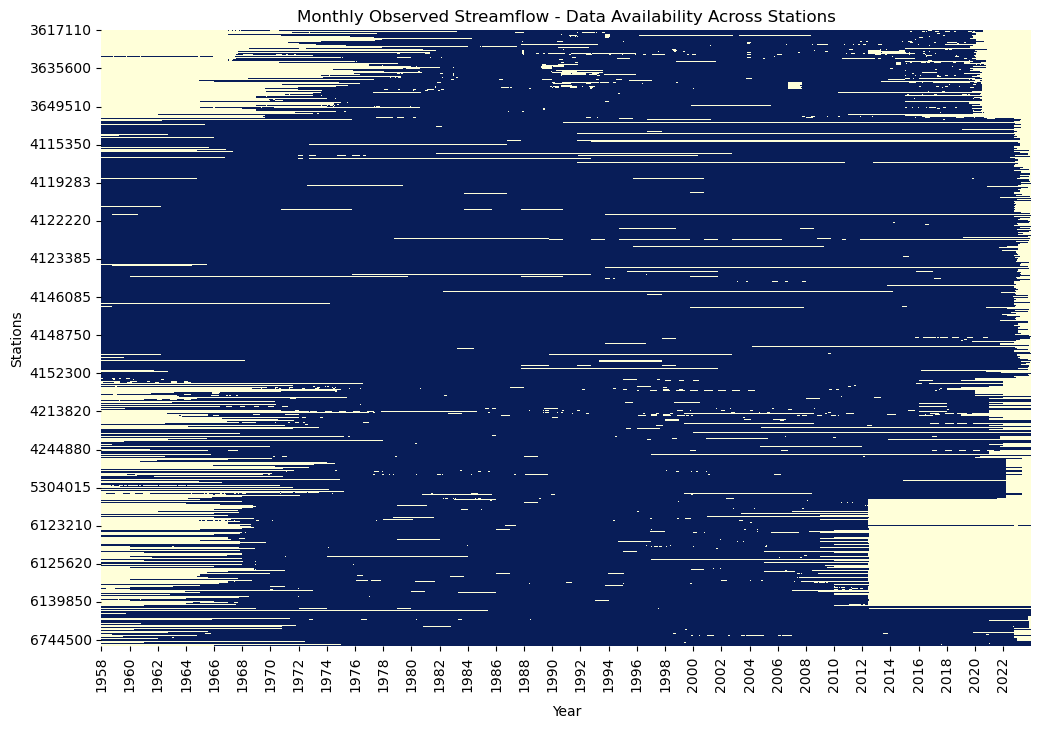

In [134]:
''' Missing Data Heatmap Visualization of the stations that resulted from the determination of the monthly recession constant (k) '''

df_processing = obs_df.copy()
print(f"Number of stations: {len(sim_sts)}")
df_processing = df_processing[sim_sts] # Selecting only the stations that resulted from the previous analysis of recession constant (k) and are in the simulated data.
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)
dates = df_processing.index

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap on the given axis
sns.heatmap(missing_matrix.T, cmap="YlGnBu", cbar=False, yticklabels=50) # Yellow & blue: cmap="YlGnBu" (lighter = missing, darker = available).

# Set x-ticks to show only the first day of every second year
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=90)  # Rotate for better visibility

# Adjust space between x-tick labels and x-axis label
ax.set_xlabel("Year", labelpad=10)  # Increase labelpad to add more space

# Labels and title
ax.set_ylabel("Stations")
ax.set_title("Monthly Observed Streamflow - Data Availability Across Stations")

plt.show()

Number of stations: 808


C:\Users\jvalenciag\AppData\Local\Temp\ipykernel_37856\3782379441.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


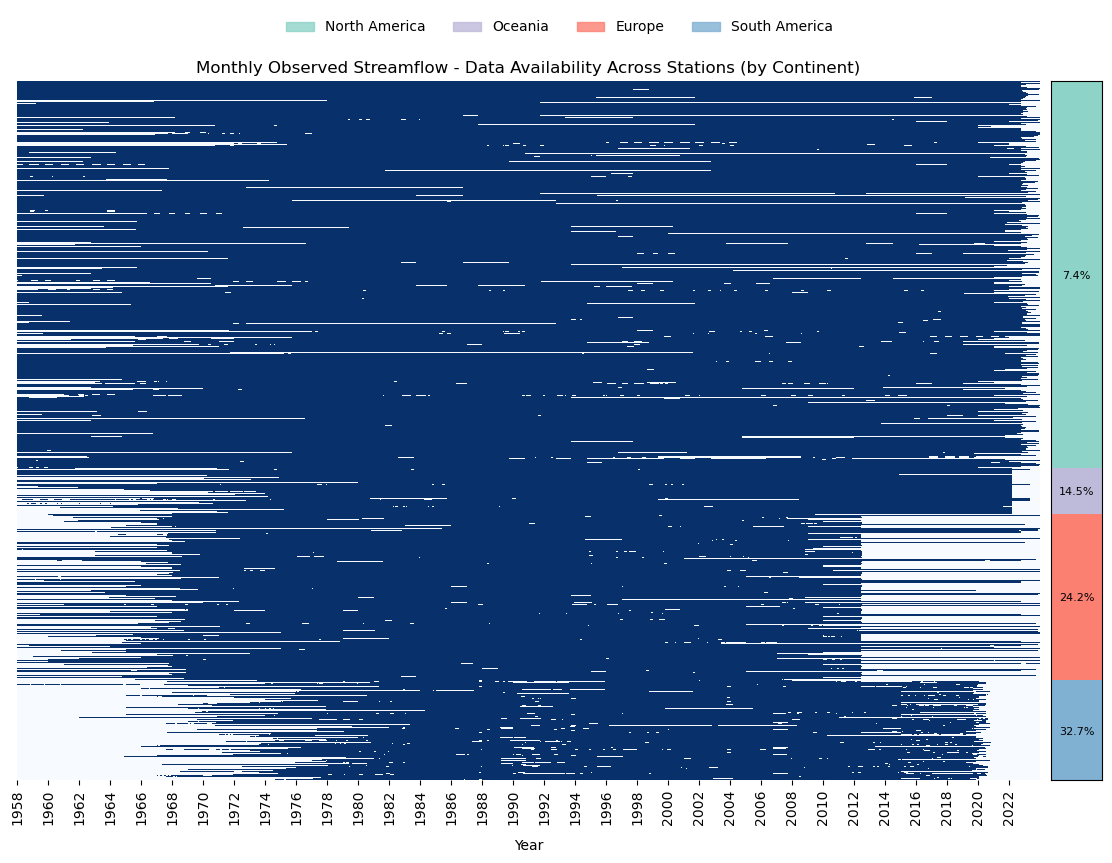

In [135]:
''' Missing Data Heatmap Visualization of the stations that passed the validation analysis based on monthly k recessions '''

import matplotlib.patches as mpatches

# Define unique continents
unique_continents = list(continent_missing_pct_filtered_css.sort_values().keys())

df_processing = obs_df.copy()
total_stations = len(sim_sts)
print(f"Number of stations: {total_stations}")
df_processing = df_processing[sim_sts] # Select only the stations that passed the validation analysis
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)

# Get continent information for each station
station_continents = filtered_css[filtered_css["station_no"].astype(str).isin(sim_sts)].set_index('station_no')['Continent']

# Group and reorder by station number by Continent
station_continents_grouped = station_continents.loc[station_continents.map({v: i for i, v in enumerate(unique_continents)}).sort_values().index]
station_continents_grouped

# Ensure the order of stations matches
missing_matrix = missing_matrix[station_continents_grouped.index.astype(str)]

# Beautiful, soft, and distinct color palette
beautiful_colors = [
    '#8DD3C7',  # Soft mint
    '#BEBADA',  # Soft lavender
    '#FB8072',  # Soft coral
    '#80B1D3',  # Soft sky blue
    '#FDB462',  # Soft orange
    '#B3DE69',  # Soft lime green
    '#FCCDE5',  # Soft pink
    '#D9D9D9',  # Soft gray
    '#BC80BD',  # Soft purple
    '#FFFFB3',  # Soft yellow
    '#CCEBC5',  # Soft sage
    '#FFED6F'   # Soft golden yellow
]

# Create color mapping for continents
n_continents = len(unique_continents)
continent_colors = {continent: beautiful_colors[i % len(beautiful_colors)] 
                   for i, continent in enumerate(unique_continents)}

# Create a figure with subplots - main heatmap and continent color bar
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 20], width_ratios=[20, 1], hspace=0.1, wspace=0.02)

# Set x-ticks to show only the first day of every second year
dates = df_processing.index
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

# Add continent color bar on the right
ax_continent = fig.add_subplot(gs[1, 1])
ax_continent.set_xlim(0, 1)
ax_continent.set_ylim(0, len(missing_matrix.columns))
ax_continent.set_xticks([])
ax_continent.set_yticks([])

# Create continent legend
legend_elements = [mpatches.Patch(color=color, label=continent, alpha=0.8) 
                  for continent, color in continent_colors.items() 
                  if continent in unique_continents]

# Place legend at the top
ax_legend = fig.add_subplot(gs[0, :])
ax_legend.legend(handles=legend_elements, loc='center', ncol=len(legend_elements), 
                frameon=False, fontsize=10)
ax_legend.set_xticks([])
ax_legend.set_yticks([])
ax_legend.spines['top'].set_visible(False)
ax_legend.spines['right'].set_visible(False)
ax_legend.spines['bottom'].set_visible(False)
ax_legend.spines['left'].set_visible(False)

# Main heatmap
ax_main = fig.add_subplot(gs[1, 0])
sns.heatmap(missing_matrix.T, cmap="Blues", cbar=False, yticklabels=False, ax=ax_main)

# Re-apply the formatting
ax_main.set_xticks(xtick_locs)
ax_main.set_xticklabels(xtick_labels, rotation=90)
ax_main.set_xlabel("Year", labelpad=10)
ax_main.set_ylabel("")
ax_main.set_title("Monthly Observed Streamflow - Data Availability Across Stations (by Continent)")

# Update the continent color bar with ordered data
ax_continent.clear()
ax_continent.set_xlim(0, 1)
ax_continent.set_ylim(0, len(missing_matrix.columns))

# Draw a solid vertical bar with each station's color and missing data percentage
# Fill from top to bottom by reversing the y-coordinate
for i, (station, continent) in enumerate(station_continents_grouped.items()):
    color = continent_colors.get(continent, '#CCCCCC')
    # Use (total_stations - 1 - i) to fill from top to bottom
    y_pos = total_stations - 1 - i
    
    # Add the colored rectangle
    ax_continent.add_patch(
        mpatches.Rectangle((0, y_pos), 1, 1, color=color, linewidth=0)
    )

sum_position = 0
for i, continent in enumerate(unique_continents):
    color = continent_colors.get(continent, '#CCCCCC')
    sum_position = sum_position + number_sts_filtered_css[continent]
    # Use (total_stations - 1 - i) to fill from top to bottom
    y_pos = total_stations - 1 - sum_position + number_sts_filtered_css[continent]/2
    
    # Add the missing percentage text (one per continent)
    missing_pct = continent_missing_pct_filtered_css.get(continent, 0)
    ax_continent.text(
        0.5, y_pos + 0.5,  # Center the text in the rectangle
        f'{missing_pct:.1f}%',  # Format to 1 decimal place
        ha='center', va='center',  # Center alignment
        fontsize=8,  # Adjust font size as needed
        color='white' if sum(int(color[i:i+2], 16) for i in (1, 3, 5)) < 384 else 'black'  # White text on dark colors, black on light
    )

ax_continent.set_xticks([])
ax_continent.set_yticks([])

plt.tight_layout()
plt.show()

In [136]:
# Calculate the percentage of missing data by Continent for stations in stats_all_years_no_low_r_no_erronous.index, which passed the validation analysis based on monthly k recessions

selected_stations = stats_all_years_no_low_r_no_erronous.index.astype(str)
obs_selected = obs_df[selected_stations]

# Get continent information for each station - ensure matching data types
station_to_continent = filtered_css[filtered_css["station_no"].astype(str).isin(selected_stations)].set_index('station_no')['Continent']

# Convert station_to_continent index to string to match obs_selected columns
station_to_continent.index = station_to_continent.index.astype(str)

# Calculate missing data percentage per station
missing_pct_per_station = obs_selected.isna().sum() / len(obs_selected) * 100

# Align the series properly before grouping
# Only keep stations that exist in both datasets
common_stations = missing_pct_per_station.index.intersection(station_to_continent.index)
missing_pct_aligned = missing_pct_per_station[common_stations]
continent_mapping_aligned = station_to_continent[common_stations]

# Group by continent and calculate the mean missing percentage
continent_missing_pct_final = missing_pct_aligned.groupby(continent_mapping_aligned).mean().sort_values(ascending=False)

print("Percentage of missing data by Continent (mean across stations):")
print(continent_missing_pct_final)
print(f"Number of stations processed: {len(common_stations)}")

Percentage of missing data by Continent (mean across stations):
Continent
South America    31.379007
Europe           23.862078
Oceania          14.245718
North America     5.521249
dtype: float64
Number of stations processed: 588


Number of stations: 588


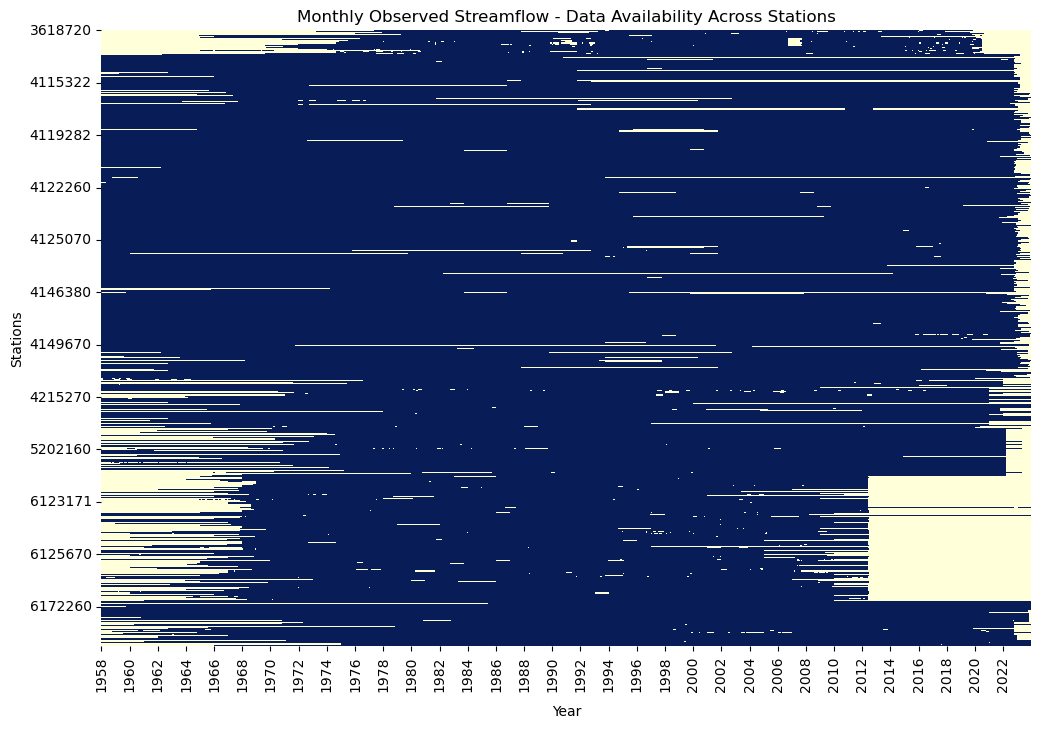

In [137]:
''' Missing Data Heatmap Visualization of the stations that passed the validation analysis based on monthly k recessions '''

df_processing = obs_df.copy()
print(f"Number of stations: {len(stats_all_years_no_low_r_no_erronous)}")
df_processing = df_processing[stats_all_years_no_low_r_no_erronous.index] # Select only the stations that passed the validation analysis
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)
dates = df_processing.index

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap on the given axis
sns.heatmap(missing_matrix.T, cmap="YlGnBu", cbar=False, yticklabels=50) # Yellow & blue: cmap="YlGnBu" (lighter = missing, darker = available).

# Set x-ticks to show only the first day of every second year
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=90)  # Rotate for better visibility

# Adjust space between x-tick labels and x-axis label
ax.set_xlabel("Year", labelpad=10)  # Increase labelpad to add more space

# Labels and title
ax.set_ylabel("Stations")
ax.set_title("Monthly Observed Streamflow - Data Availability Across Stations")

plt.show()

Number of stations: 588


C:\Users\jvalenciag\AppData\Local\Temp\ipykernel_37856\30861794.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


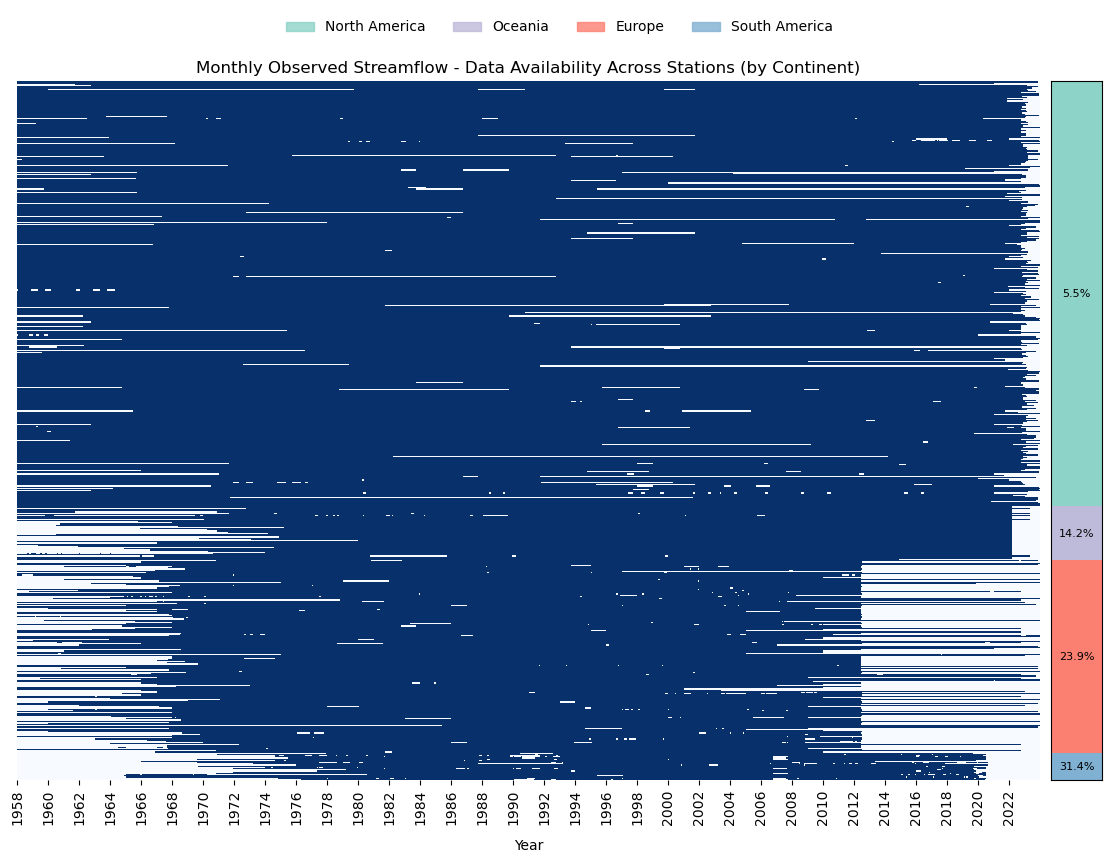

In [138]:
''' Missing Data Heatmap Visualization of the stations that passed the validation analysis based on monthly k recessions '''

import matplotlib.patches as mpatches

# Define unique continents
unique_continents = list(continent_missing_pct_final.sort_values().keys())

df_processing = obs_df.copy()
total_stations = len(stats_all_years_no_low_r_no_erronous)
print(f"Number of stations: {total_stations}")
df_processing = df_processing[stats_all_years_no_low_r_no_erronous.index] # Select only the stations that passed the validation analysis
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)

# Get continent information for each station
station_continents = filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes"].set_index('station_no')['Continent']

# Group and reorder by station number by Continent
station_continents_grouped = station_continents.loc[station_continents.map({v: i for i, v in enumerate(unique_continents)}).sort_values().index]
station_continents_grouped

# Ensure the order of stations matches
missing_matrix = missing_matrix[station_continents_grouped.index.astype(str)]

# Beautiful, soft, and distinct color palette
beautiful_colors = [
    '#8DD3C7',  # Soft mint
    '#BEBADA',  # Soft lavender
    '#FB8072',  # Soft coral
    '#80B1D3',  # Soft sky blue
    '#FDB462',  # Soft orange
    '#B3DE69',  # Soft lime green
    '#FCCDE5',  # Soft pink
    '#D9D9D9',  # Soft gray
    '#BC80BD',  # Soft purple
    '#FFFFB3',  # Soft yellow
    '#CCEBC5',  # Soft sage
    '#FFED6F'   # Soft golden yellow
]

# Create color mapping for continents
n_continents = len(unique_continents)
continent_colors = {continent: beautiful_colors[i % len(beautiful_colors)] 
                   for i, continent in enumerate(unique_continents)}

# Create a figure with subplots - main heatmap and continent color bar
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 20], width_ratios=[20, 1], hspace=0.1, wspace=0.02)

# Set x-ticks to show only the first day of every second year
dates = df_processing.index
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

# Add continent color bar on the right
ax_continent = fig.add_subplot(gs[1, 1])
ax_continent.set_xlim(0, 1)
ax_continent.set_ylim(0, len(missing_matrix.columns))
ax_continent.set_xticks([])
ax_continent.set_yticks([])

# Create continent legend
legend_elements = [mpatches.Patch(color=color, label=continent, alpha=0.8) 
                  for continent, color in continent_colors.items() 
                  if continent in unique_continents]

# Place legend at the top
ax_legend = fig.add_subplot(gs[0, :])
ax_legend.legend(handles=legend_elements, loc='center', ncol=len(legend_elements), 
                frameon=False, fontsize=10)
ax_legend.set_xticks([])
ax_legend.set_yticks([])
ax_legend.spines['top'].set_visible(False)
ax_legend.spines['right'].set_visible(False)
ax_legend.spines['bottom'].set_visible(False)
ax_legend.spines['left'].set_visible(False)

# Main heatmap
ax_main = fig.add_subplot(gs[1, 0])
sns.heatmap(missing_matrix.T, cmap="Blues", cbar=False, yticklabels=False, ax=ax_main)

# Re-apply the formatting
ax_main.set_xticks(xtick_locs)
ax_main.set_xticklabels(xtick_labels, rotation=90)
ax_main.set_xlabel("Year", labelpad=10)
ax_main.set_ylabel("")
ax_main.set_title("Monthly Observed Streamflow - Data Availability Across Stations (by Continent)")

# Update the continent color bar with ordered data
ax_continent.clear()
ax_continent.set_xlim(0, 1)
ax_continent.set_ylim(0, len(missing_matrix.columns))

# Draw a solid vertical bar with each station's color and missing data percentage
# Fill from top to bottom by reversing the y-coordinate
for i, (station, continent) in enumerate(station_continents_grouped.items()):
    color = continent_colors.get(continent, '#CCCCCC')
    # Use (total_stations - 1 - i) to fill from top to bottom
    y_pos = total_stations - 1 - i
    
    # Add the colored rectangle
    ax_continent.add_patch(
        mpatches.Rectangle((0, y_pos), 1, 1, color=color, linewidth=0)
    )

sum_position = 0
for i, continent in enumerate(unique_continents):
    color = continent_colors.get(continent, '#CCCCCC')
    sum_position = sum_position + number_sts_final[continent]
    # Use (total_stations - 1 - i) to fill from top to bottom
    y_pos = total_stations - 1 - sum_position + number_sts_final[continent]/2
    
    # Add the missing percentage text (one per continent)
    missing_pct = continent_missing_pct_final.get(continent, 0)
    ax_continent.text(
        0.5, y_pos + 0.5,  # Center the text in the rectangle
        f'{missing_pct:.1f}%',  # Format to 1 decimal place
        ha='center', va='center',  # Center alignment
        fontsize=8,  # Adjust font size as needed
        color='white' if sum(int(color[i:i+2], 16) for i in (1, 3, 5)) < 384 else 'black'  # White text on dark colors, black on light
    )

ax_continent.set_xticks([])
ax_continent.set_yticks([])

plt.tight_layout()
plt.show()

Let's see now the runoff (q) values for comparison with the results of this scenario

In [139]:
q_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\TerraClimate\GeoTIFF"
q_df = pd.read_csv(q_folder + "\\q_zonal_statistics_1958-2023.csv", index_col="station_no") # Simulated data
q_df

,YEAR,MONTH,DATE,COUNT,MEAN,FLOW_CMS
station_no,,,,,,
3617110,1958,1,1958-01,29790.0,133.782209,30418.669786
3617110,1958,2,1958-02,29790.0,94.737076,23848.743141
3617110,1958,3,1958-03,29790.0,108.573941,24686.951172
3617110,1958,4,1958-04,29790.0,46.757264,10985.792395
3617110,1958,5,1958-05,29790.0,17.740483,4033.734461
...,...,...,...,...,...,...
6870640,2023,8,2023-08,228.0,4.524123,3.354580
6870640,2023,9,2023-09,228.0,69.341228,53.129506
6870640,2023,10,2023-10,228.0,0.139035,0.103093


In [140]:
q_df_pivoted = q_df.reset_index().pivot(index='DATE', columns='station_no', values='FLOW_CMS') # "FLOW_CMS" was calculated using the default area ("CATCHMENT_SIZE2") from GRDC information
q_df_pivoted.index.name = "YYYY-MM" # Renaming index to YYYY-MM for consistency with observed data
q_df_pivoted.columns.name = None # Removing the name of the columns to avoid confusion with the observed data
q_df_pivoted.columns = q_df_pivoted.columns.map(str) # Converting column names to string for consistency with observed data
q_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,30418.669786,14205.516959,2524.722925,166.793399,8279.298515,5134.970537,131.593978,4.387927,6.715142,68.256405,...,0.115870,0.240681,1.549751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-02,23848.743141,12550.542394,3199.364015,208.438188,7153.133877,4033.834597,133.319970,3.714735,5.762126,59.988037,...,19.204289,259.001156,395.390854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-03,24686.951172,16763.396446,4620.226302,191.188325,14410.476689,8690.472094,125.203116,2.712254,4.644273,55.716010,...,1.767420,102.614373,86.567401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-04,10985.792395,5891.710325,2065.468802,163.196881,29951.074120,22143.374669,809.539868,22.703979,37.964362,442.792571,...,307.769232,918.328497,552.972703,0.000000,0.000000,1.597581,0.000000,0.405494,6.454026,0.000000
1958-05,4033.734461,424.555215,41.172485,1.756029,16325.330608,12294.834127,2916.252046,173.459528,250.063498,1747.972709,...,55.094371,234.100082,179.832215,7.982829,16.488467,101.108316,10.642615,7.877449,36.359650,118.639944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,235.754361,96.150206,10.059229,0.381905,4033.022803,4058.345291,564.371588,32.236069,36.345724,337.360149,...,8.954571,26.392320,17.215781,0.464302,13.915573,3.238820,5.209120,0.398248,1.400494,3.354580
2023-09,390.187198,205.320395,38.750888,1.934472,2675.232493,2386.618536,87.791320,3.870573,5.525455,44.695534,...,6.884340,15.059579,9.577724,7.073001,23.551538,41.021468,10.806283,3.224264,6.407645,53.129506
2023-10,457.272435,221.639239,38.725726,2.432442,510.111526,470.343259,110.677070,4.901541,7.035489,58.348768,...,5.237116,13.689283,15.596088,0.172034,0.000000,3.742561,0.000000,1.888954,27.464460,0.103093


In [141]:
merged_q_df = obs_df.add_suffix('_obs').join(q_df_pivoted.add_suffix('_sim'), how='left', on="YYYY-MM") # Merging observed and simulated data on the index (YYYY-MM)
merged_q_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.115870,0.240681,1.549751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.204289,259.001156,395.390854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.767420,102.614373,86.567401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,307.769232,918.328497,552.972703,0.000000,0.000000,1.597581,0.000000,0.405494,6.454026,0.000000
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.094371,234.100082,179.832215,7.982829,16.488467,101.108316,10.642615,7.877449,36.359650,118.639944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.954571,26.392320,17.215781,0.464302,13.915573,3.238820,5.209120,0.398248,1.400494,3.354580
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.884340,15.059579,9.577724,7.073001,23.551538,41.021468,10.806283,3.224264,6.407645,53.129506
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.237116,13.689283,15.596088,0.172034,0.000000,3.742561,0.000000,1.888954,27.464460,0.103093


In [142]:
filtered_merged_q_df = merged_q_df.loc[merged_q_df.index >= f'{initial_year}-01']
filtered_merged_q_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1964-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1964-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.001169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1964-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.081276,66.517136,116.817280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1964-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164.519010,637.072229,654.148864,0.000000,0.000000,10.234231,0.000000,2.030285,27.376312,0.000000
1964-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.447455,116.517534,60.479931,19.608642,37.246482,106.976733,20.600057,6.298848,4.367820,143.450830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.954571,26.392320,17.215781,0.464302,13.915573,3.238820,5.209120,0.398248,1.400494,3.354580
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.884340,15.059579,9.577724,7.073001,23.551538,41.021468,10.806283,3.224264,6.407645,53.129506
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.237116,13.689283,15.596088,0.172034,0.000000,3.742561,0.000000,1.888954,27.464460,0.103093


In [143]:
reindexed_q_df = q_df_pivoted.copy()
reindexed_q_df.index = pd.to_datetime(reindexed_q_df.index, format='%Y-%m')
reindexed_q_df['water_year'] = reindexed_q_df.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_q_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,30418.669786,14205.516959,2524.722925,166.793399,8279.298515,5134.970537,131.593978,4.387927,6.715142,68.256405,...,0.240681,1.549751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1958
1958-02-01,23848.743141,12550.542394,3199.364015,208.438188,7153.133877,4033.834597,133.319970,3.714735,5.762126,59.988037,...,259.001156,395.390854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1958
1958-03-01,24686.951172,16763.396446,4620.226302,191.188325,14410.476689,8690.472094,125.203116,2.712254,4.644273,55.716010,...,102.614373,86.567401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1958
1958-04-01,10985.792395,5891.710325,2065.468802,163.196881,29951.074120,22143.374669,809.539868,22.703979,37.964362,442.792571,...,918.328497,552.972703,0.000000,0.000000,1.597581,0.000000,0.405494,6.454026,0.000000,1958
1958-05-01,4033.734461,424.555215,41.172485,1.756029,16325.330608,12294.834127,2916.252046,173.459528,250.063498,1747.972709,...,234.100082,179.832215,7.982829,16.488467,101.108316,10.642615,7.877449,36.359650,118.639944,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,235.754361,96.150206,10.059229,0.381905,4033.022803,4058.345291,564.371588,32.236069,36.345724,337.360149,...,26.392320,17.215781,0.464302,13.915573,3.238820,5.209120,0.398248,1.400494,3.354580,2023
2023-09-01,390.187198,205.320395,38.750888,1.934472,2675.232493,2386.618536,87.791320,3.870573,5.525455,44.695534,...,15.059579,9.577724,7.073001,23.551538,41.021468,10.806283,3.224264,6.407645,53.129506,2023
2023-10-01,457.272435,221.639239,38.725726,2.432442,510.111526,470.343259,110.677070,4.901541,7.035489,58.348768,...,13.689283,15.596088,0.172034,0.000000,3.742561,0.000000,1.888954,27.464460,0.103093,2024


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and complete water-years (aggregated runoff) - Comparison of observed flows and simulated runoff**

In [144]:
stats_q_all_years = calculate_stats_complete_wateryears(
    sts_with_full_years,
    reindexed_obs_df.groupby('water_year').mean(),
    reindexed_q_df.groupby('water_year').mean()
)
# Display the results
stats_q_all_years = stats_q_all_years[stats_q_all_years.index.isin(stats_all_years_no_low_r_no_erronous.index)]
stats_q_all_years.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,588.00,588.00,588.00,588.00,588.00,588.00,588.00
mean,35.31,39.14,0.81,0.50,-1.23,0.46,-22.42
std,112.50,120.26,0.10,0.15,5.47,0.32,32.52
min,0.07,0.10,0.36,0.09,-81.02,-1.44,-94.76
25%,1.87,2.29,0.74,0.39,-1.07,0.33,-41.21
50%,7.21,8.73,0.83,0.51,0.00,0.53,-26.47
75%,23.37,27.09,0.88,0.61,0.35,0.68,-9.04
max,1642.76,1658.10,0.97,0.88,0.94,0.96,172.98


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and all monthly flow series - Comparison of observed flows and simulated runoff**

In [145]:
stats_q_df = calculate_stats(filtered_merged_q_df, q_df_pivoted)
stats_q_df = stats_q_df[stats_q_df.index.isin(stats_all_years_no_low_r_no_erronous.index)]
stats_q_df.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,588.00,588.00,588.00,588.00,588.00,588.00,588.00
mean,71.63,105.48,0.66,0.58,-0.75,-0.07,-22.43
std,206.23,294.46,0.14,0.10,2.28,0.66,32.44
min,0.21,0.33,0.07,0.14,-26.84,-5.38,-94.88
25%,4.06,6.83,0.57,0.53,-0.84,-0.31,-41.42
50%,16.71,26.54,0.67,0.59,-0.10,0.07,-26.45
75%,50.82,79.68,0.76,0.65,0.25,0.31,-9.00
max,1878.37,3067.89,0.95,0.87,0.88,0.85,190.34
